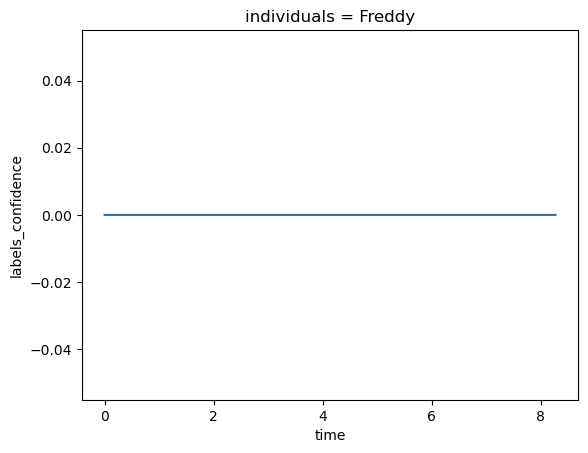

In [8]:
dt_corr.sel(trials=97).labels_confidence.squeeze().plot()

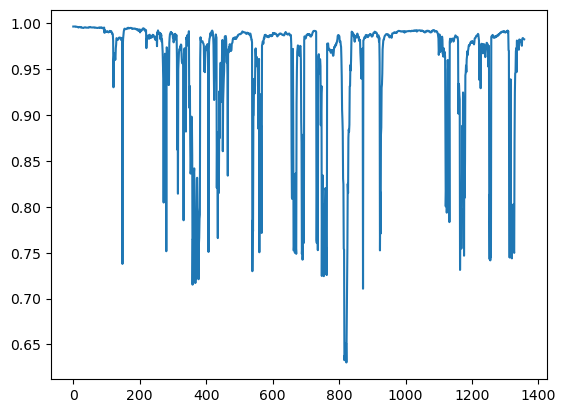

In [6]:
plt.plot(ds_corr.labels_confidence.squeeze().values,)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


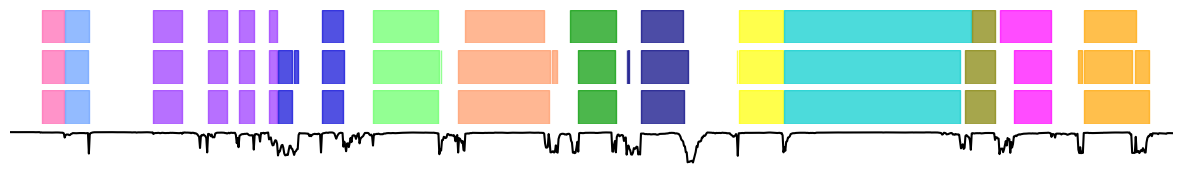

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from ethograph.utils.io import TrialTree
from ethograph.utils.labels import plot_motif_segments, load_motif_mapping

data_path = Path(r"C:\Users\Admin\Desktop\trainFreddy\Trial_data2701.nc")
mapping_path = Path(r"C:\Users\Admin\Documents\Akseli\Code\MovFormer\configs_global\mapping.txt")


path = r"C:\Users\Admin\Desktop\trainFreddy\fig2\Trial_data2601_predictions_corr_20251103_233900.nc"

dt_corr = TrialTree.load(path)


path = r"C:\Users\Admin\Desktop\trainFreddy\fig2\Trial_data2601_predictions_uncorr_20251103_233900.nc"

dt_encoder = TrialTree.load(path)


path = r"C:\Users\Admin\Desktop\trainFreddy\Trial_data2601.nc"
dt_true = TrialTree.load(path)



fig, axs = plt.subplots(4, 1, figsize=(15, 2), sharex=True)
motif_mapping = load_motif_mapping(mapping_path)

trial = 33


ds_corr = dt_corr.sel(trials=trial)
ds_encoder = dt_encoder.sel(trials=trial)
ds_true = dt_true.sel(trials=trial)
time = ds_true['time'].values

labels_corr = ds_corr.labels.squeeze().values
labels_encoder = ds_encoder.labels.squeeze().values
labels_true = ds_true.labels.squeeze().values

plot_motif_segments(axs[0], time, labels_true, motif_mapping)
plot_motif_segments(axs[1], time, labels_encoder, motif_mapping)
plot_motif_segments(axs[2], time, labels_corr, motif_mapping)

axs[3].plot(time, ds_corr.labels_confidence.squeeze().values, color='black')

for ax in axs:
    ax.tick_params(left=False, bottom=False)  # Hide ticks
    ax.spines['top'].set_visible(False)  # Hide top box
    ax.spines['right'].set_visible(False)  # Hide right box
    ax.spines['left'].set_visible(False)  # Hide left box
    ax.spines['bottom'].set_visible(False)  # Hide bottom box
    ax.set_yticks([])  # Hide y-axis ticks
    ax.set_xticks([])
    ax.set_xlim(0.3, time[-1])
    
plt.savefig("figure2/figure2_comp.eps")